## Introduction

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to 
understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, 
the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the 
pricing dynamics of a new market. 

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [175]:
carData = pd.read_csv("CarPrice_Assignment.csv")
carData

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [176]:
carData.shape

(205, 26)

In [177]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [178]:
carData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [179]:
#No Null values
carData.isnull().sum(axis=0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [180]:
# Dropping columns not needed for linear regression
cols_dropped = ["car_ID","symboling"] 
carData = carData.drop(cols_dropped, axis=1)
carData

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [181]:
carData['CarName'] = carData['CarName'].apply(lambda x: x.split(" ")[0])
carData.head(20)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Data Understanding

In [182]:
carData.shape

(205, 24)

In [183]:
carData.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [184]:
#There are spelling errors in names in Car Names
carData.CarName = carData.CarName.str.lower()

In [185]:
# Replacing all error names with actual names
carData.CarName.replace('maxda','mazda',inplace=True)
carData.CarName.replace('porcshce','porsche',inplace=True)
carData.CarName.replace('toyouta','toyota',inplace=True)
carData.CarName.replace('vokswagen','volkswagen',inplace=True)
carData.CarName.replace('vw','volkswagen',inplace=True)

In [186]:
#Checking for duplicates
carData.loc[carData.duplicated()]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Dealing with Categorical columns
- CompanyName
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

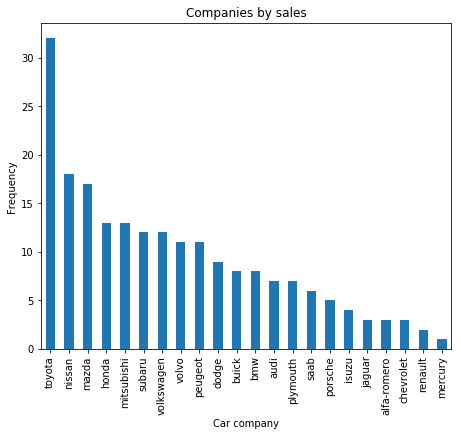

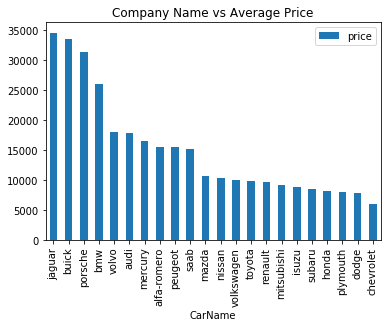

In [187]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = carData.CarName.value_counts().plot('bar')
plt.title('Companies by sales')
plt1.set(xlabel = 'Car company', ylabel='Frequency')

df = pd.DataFrame(carData.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

Inference -:
    1> Toyota has the highest number of car sales followed by Nissan and Mazda.
    2> Sedan and Hatchbacks are the most sold car body types.

In [188]:
carData.groupby(['carbody'])['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

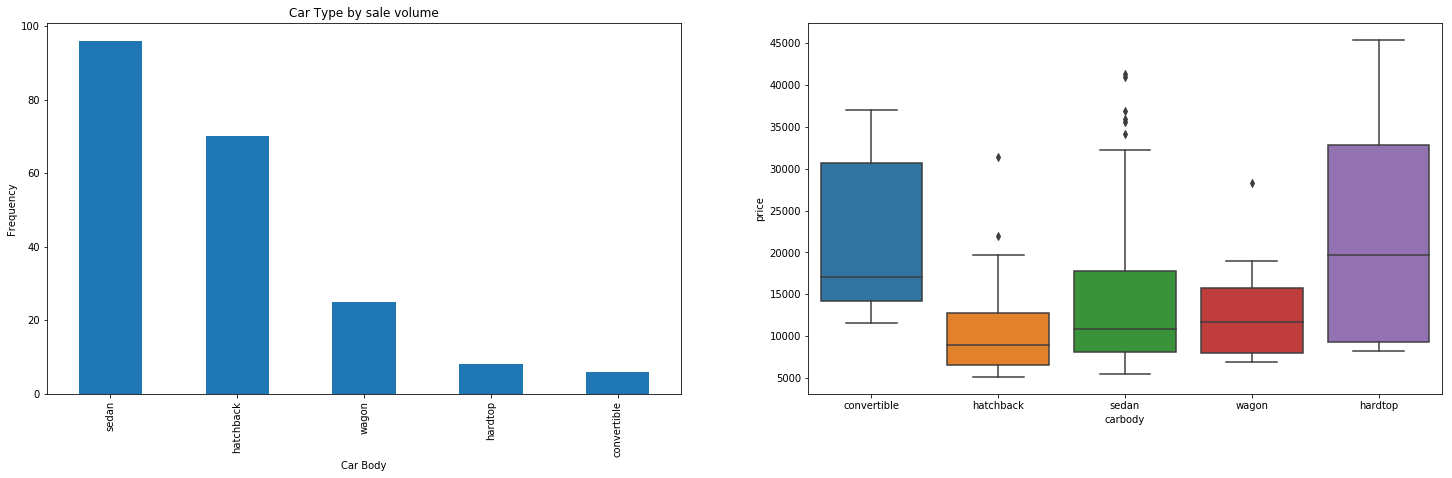

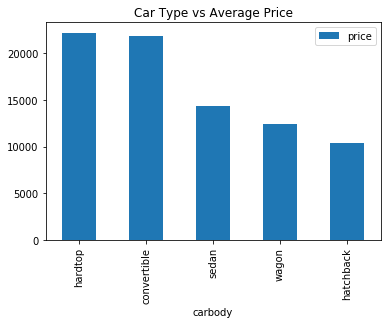

In [189]:
# Car Body is significant
plt.figure(figsize=(25, 15))

plt.subplot(2,2,1)
plt1 = carData.carbody.value_counts().plot('bar')
plt.title('Car Type by sale volume')
plt1.set(xlabel = 'Car Body', ylabel='Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = carData)

df = pd.DataFrame(carData.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

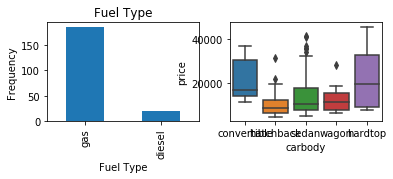

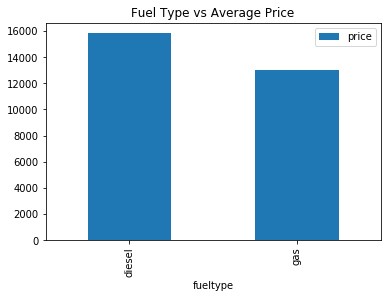

In [190]:
# Fuel type is significant
plt.subplot(2,2,1)
plt1 = carData.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = carData)

df = pd.DataFrame(carData.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

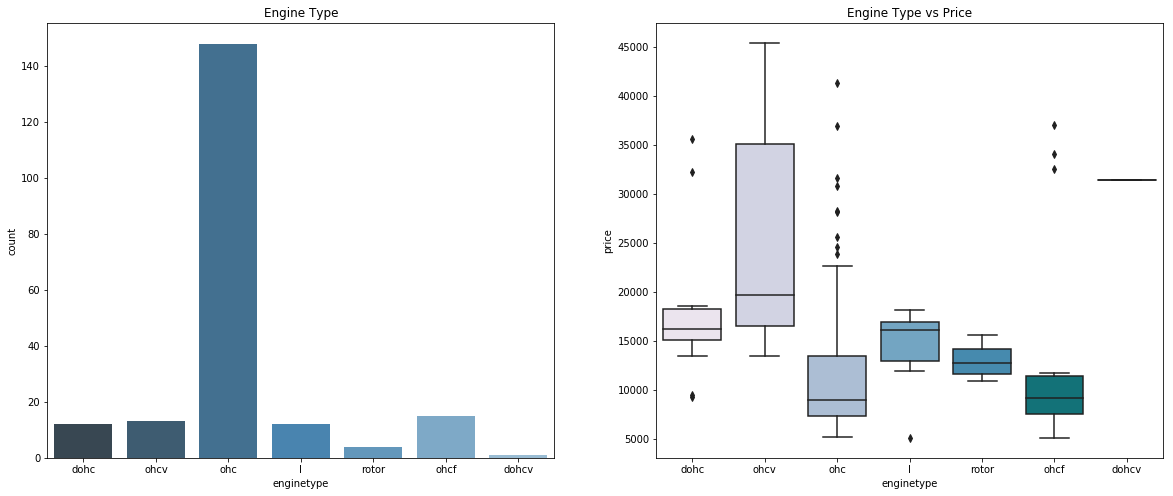

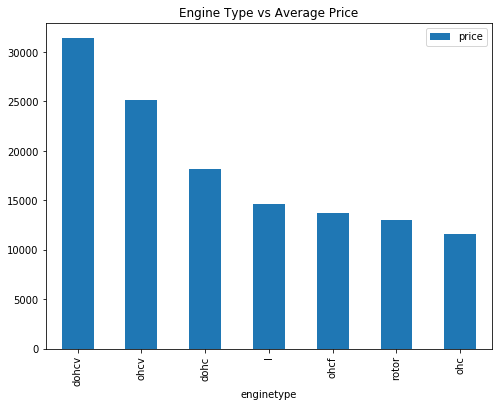

In [191]:
# Engine type is significant
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(carData.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=carData.enginetype, y=carData.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(carData.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

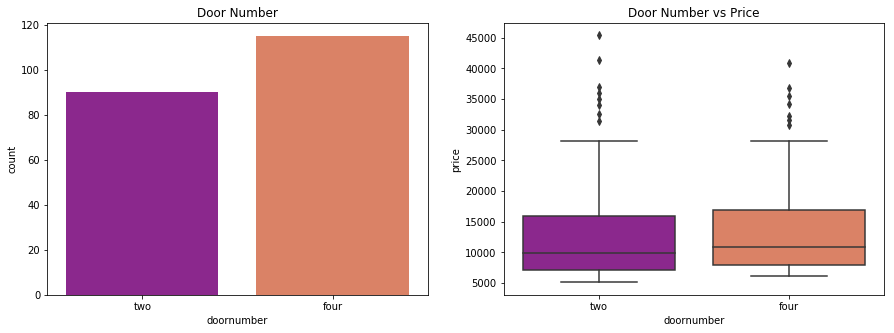

In [192]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number')
sns.countplot(carData.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=carData.doornumber, y=carData.price, palette=("plasma"))

plt.show()

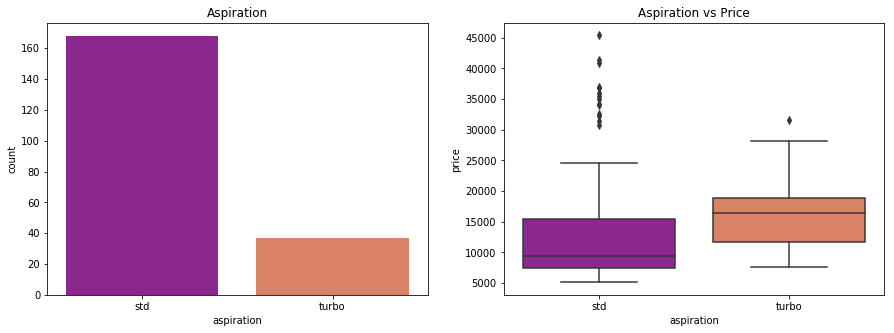

In [193]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(carData.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=carData.aspiration, y=carData.price, palette=("plasma"))

plt.show()

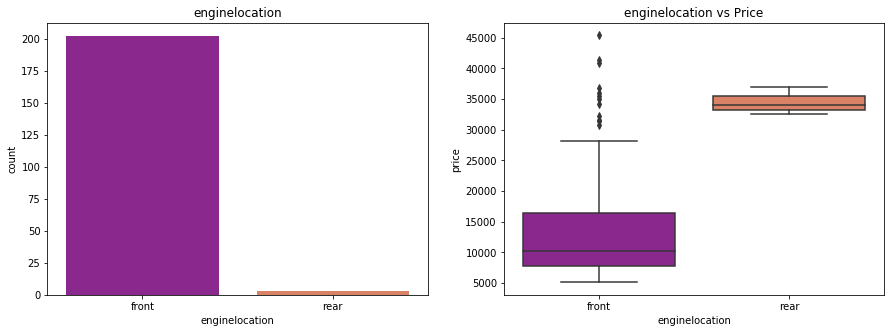

In [194]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('enginelocation')
sns.countplot(carData.enginelocation, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=carData.enginelocation, y=carData.price, palette=("plasma"))

plt.show()

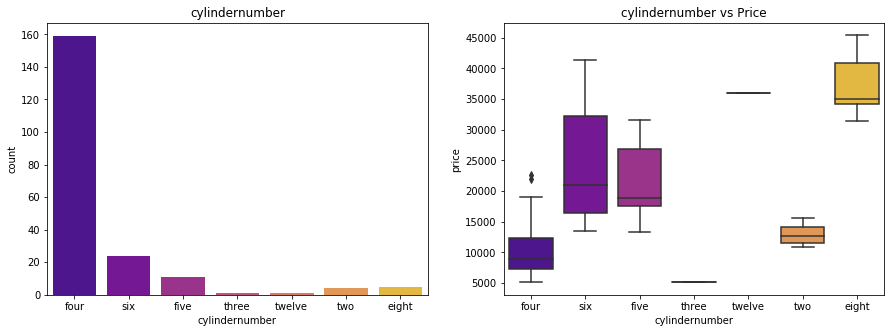

In [195]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('cylindernumber')
sns.countplot(carData.cylindernumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('cylindernumber vs Price')
sns.boxplot(x=carData.cylindernumber, y=carData.price, palette=("plasma"))

plt.show()

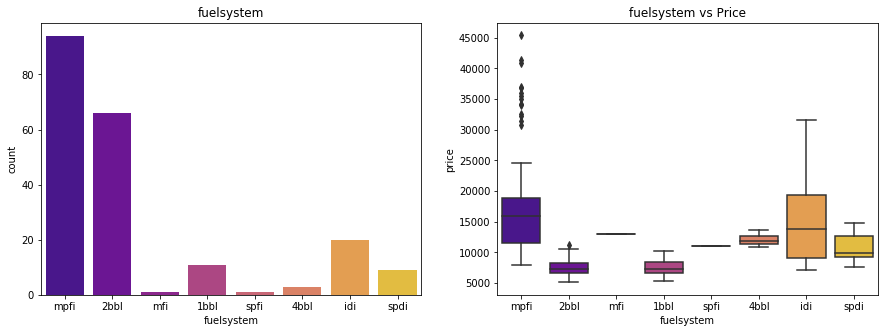

In [196]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('fuelsystem')
sns.countplot(carData.fuelsystem, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('fuelsystem vs Price')
sns.boxplot(x=carData.fuelsystem, y=carData.price, palette=("plasma"))

plt.show()

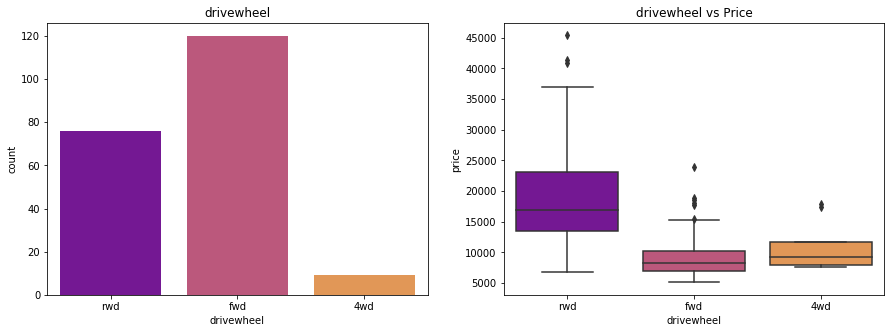

In [197]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('drivewheel')
sns.countplot(carData.drivewheel, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('drivewheel vs Price')
sns.boxplot(x=carData.drivewheel, y=carData.price, palette=("plasma"))

plt.show()

##### Observations-:
    1. Door Number variable has very less variance in the data and the median of two and four door are very closed.Could be dropped.
    2. Engine Location variable has the "front" category in 98% rows and thus could be dropped.

###### Dealing with Numerical columns

In [198]:
#Fuel economy
carData['mileage'] = (0.55 * carData['citympg']) + (0.45 * carData['highwaympg'])

In [199]:
carData = carData.drop(["citympg","highwaympg"],axis=1)

In [200]:
#Numerical columns
cols = carData.columns.tolist()
num_cols = ["price","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio",
 "horsepower","peakrpm","mileage"]

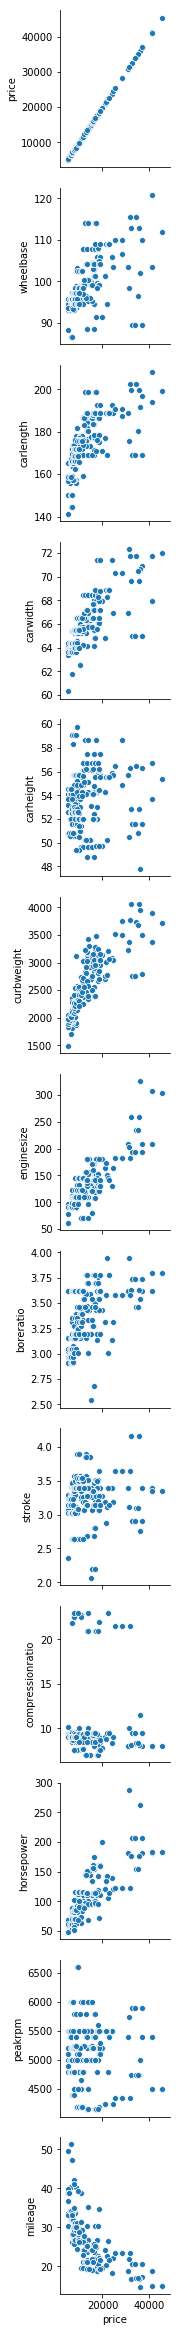

In [201]:
#visualizing numerical variables with price
sns.pairplot(carData, x_vars = ["price"], y_vars = num_cols)
plt.show()

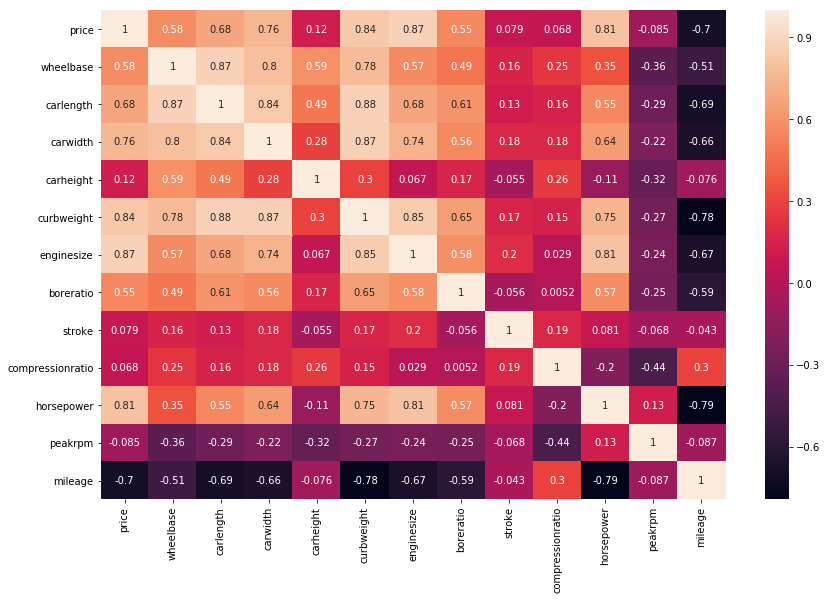

In [202]:
carDataNumeric = carData[num_cols].corr()
plt.subplots(figsize=(14, 9))
sns.heatmap(carDataNumeric, 
            xticklabels=carDataNumeric.columns.values,
            yticklabels=carDataNumeric.columns.values,annot= True)
plt.show()

##### Observations-:
    Carheight, Stroke, Compressionratio and peakrpm has very less correlation with price and hence can be dropped.



In [203]:
# Dropping variables based on visual analysis
drop_these = ["doornumber","enginelocation","carheight","stroke","compressionratio","peakrpm"]
carData = carData.drop(drop_these,axis=1)
carData.columns

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'price', 'mileage'],
      dtype='object')

List of significant variables after Visual analysis 
- CarName 
- Engine Type 
- Engine Location
- Fuel Type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Mileage

## Data Preparation


In [204]:
# Creating dummies out of unordered categorical variables
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

carData = dummies('CarName',carData)
carData = dummies('fueltype',carData)
carData = dummies('aspiration',carData)
carData = dummies('carbody',carData)
carData = dummies('drivewheel',carData)
carData = dummies('enginetype',carData)
carData = dummies('fuelsystem',carData)
carData = dummies('cylindernumber',carData)

In [205]:
carData.head(10)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,audi,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.000,23.70,0,...,0,1,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.000,23.70,0,...,0,1,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.000,22.15,0,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.000,26.70,1,...,0,1,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.000,19.80,1,...,0,1,0,0,1,0,0,0,0,0
5,99.8,177.3,66.3,2507,136,3.19,110,15250.000,21.70,1,...,0,1,0,0,1,0,0,0,0,0
6,105.8,192.7,71.4,2844,136,3.19,110,17710.000,21.70,1,...,0,1,0,0,1,0,0,0,0,0
7,105.8,192.7,71.4,2954,136,3.19,110,18920.000,21.70,1,...,0,1,0,0,1,0,0,0,0,0
8,105.8,192.7,71.4,3086,131,3.13,140,23875.000,18.35,1,...,0,1,0,0,1,0,0,0,0,0
9,99.5,178.2,67.9,3053,131,3.13,160,17859.167,18.70,1,...,0,1,0,0,1,0,0,0,0,0


In [206]:
carData.dtypes

wheelbase     float64
carlength     float64
carwidth      float64
curbweight      int64
enginesize      int64
boreratio     float64
horsepower      int64
price         float64
mileage       float64
audi            uint8
bmw             uint8
buick           uint8
chevrolet       uint8
dodge           uint8
honda           uint8
isuzu           uint8
jaguar          uint8
mazda           uint8
mercury         uint8
mitsubishi      uint8
nissan          uint8
peugeot         uint8
plymouth        uint8
porsche         uint8
renault         uint8
saab            uint8
subaru          uint8
toyota          uint8
volkswagen      uint8
volvo           uint8
gas             uint8
turbo           uint8
hardtop         uint8
hatchback       uint8
sedan           uint8
wagon           uint8
fwd             uint8
rwd             uint8
dohcv           uint8
l               uint8
ohc             uint8
ohcf            uint8
ohcv            uint8
rotor           uint8
2bbl            uint8
4bbl      

## Train-Test Split

In [207]:
#Splitting the data by 70:30 ratio for train and test  
carData_train, carData_test = train_test_split(carData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [208]:
print(carData_train.shape)
print(carData_test.shape)

(143, 57)
(62, 57)


## MinMax Scaling

In [209]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
carData_train[num_vars] = scaler.fit_transform(carData_train[num_vars])

C:\Users\Debayan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Debayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Debayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[it

In [210]:
carData_train.head(20)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,audi,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,0,0,0,1,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,1,0,0,0,1,0,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,1,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,1,0,0,0,1,0,0,0,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,1,0,0,0,1,0,0,0,0
190,0.272414,0.400000,0.308333,0.284329,0.181132,0.404762,0.175000,0.134321,0.314129,0,...,0,1,0,0,0,1,0,0,0,0
96,0.272414,0.393496,0.291667,0.187355,0.135849,0.373016,0.087500,0.065779,0.518519,0,...,0,0,0,0,0,1,0,0,0,0
177,0.544828,0.560976,0.516667,0.376261,0.230189,0.500000,0.183333,0.169351,0.396433,0,...,0,1,0,0,0,1,0,0,0,0
181,0.617241,0.759350,0.516667,0.645074,0.377358,0.468254,0.450000,0.293726,0.176955,0,...,0,1,0,0,0,0,1,0,0,0
97,0.272414,0.473171,0.291667,0.212956,0.135849,0.373016,0.087500,0.079592,0.518519,0,...,0,0,0,0,0,1,0,0,0,0


## Model Building

In [211]:
y_train = carData_train.pop('price')
X_train = carData_train

In [212]:
X_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,audi,bmw,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.530864,0,0,...,0,0,0,0,0,1,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.213992,0,0,...,0,1,0,0,0,1,0,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.344307,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.244170,0,0,...,0,1,0,0,0,1,0,0,0,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.122085,0,0,...,0,1,0,0,0,1,0,0,0,0


In [213]:
# RFE for 15 variables
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [214]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 7),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('mileage', False, 3),
 ('audi', False, 9),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 29),
 ('dodge', False, 25),
 ('honda', False, 19),
 ('isuzu', False, 13),
 ('jaguar', True, 1),
 ('mazda', False, 31),
 ('mercury', False, 40),
 ('mitsubishi', False, 18),
 ('nissan', False, 37),
 ('peugeot', False, 15),
 ('plymouth', False, 24),
 ('porsche', True, 1),
 ('renault', False, 28),
 ('saab', False, 8),
 ('subaru', True, 1),
 ('toyota', False, 30),
 ('volkswagen', False, 35),
 ('volvo', False, 6),
 ('gas', False, 36),
 ('turbo', False, 27),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 38),
 ('rwd', False, 23),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', False, 33),
 ('ohcf', True, 1),
 ('ohcv', False, 32),
 ('rotor', False, 1

In [215]:
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'horsepower', 'bmw', 'buick', 'jaguar',
       'porsche', 'subaru', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'ohcf', 'three'],
      dtype='object')

In [216]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,horsepower,bmw,buick,jaguar,porsche,subaru,hardtop,hatchback,sedan,wagon,dohcv,ohcf,three
122,0.291667,0.272692,0.083333,0,0,0,0,0,0,0,1,0,0,0,0
125,0.666667,0.500388,0.395833,0,0,0,1,0,0,1,0,0,0,0,0
166,0.308333,0.314973,0.266667,0,0,0,0,0,0,1,0,0,0,0,0
1,0.316667,0.411171,0.262500,0,0,0,0,0,0,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0,0,0,0,0,0,0,0,1,0,0,0


In [217]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [218]:
#Build a linear model
X_train_lm = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.32e-69
Time:                        22:42:00   Log-Likelihood:                 216.35
No. Observations:                 143   AIC:                            -400.7
Df Residuals:                     127   BIC:                            -353.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0223      0.032     -0.706      0.4

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [219]:
checkVIF(X_train_rfe)

,Features,VIF
0,carwidth,44.66
1,curbweight,43.18
13,ohcf,32.36
7,subaru,30.83
2,horsepower,13.09
10,sedan,6.43
9,hatchback,3.72
6,porsche,3.17
11,wagon,2.60
12,dohcv,2.29


In [220]:
#Dropping of dohcv to high pvalue
X = X_train_rfe.drop(["dohcv"],axis = 1)

In [221]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.49e-70
Time:                        22:42:00   Log-Likelihood:                 215.80
No. Observations:                 143   AIC:                            -401.6
Df Residuals:                     128   BIC:                            -357.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0207      0.031     -0.656      0.5

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [222]:
checkVIF(X)

,Features,VIF
0,carwidth,44.17
1,curbweight,40.97
12,ohcf,25.82
7,subaru,24.92
2,horsepower,11.70
10,sedan,6.41
9,hatchback,3.67
11,wagon,2.60
6,porsche,2.06
8,hardtop,1.63


In [223]:
#Dropping of carwidth to high VIF
X = X.drop(["carwidth"],axis = 1)

In [224]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.07e-66
Time:                        22:42:00   Log-Likelihood:                 202.37
No. Observations:                 143   AIC:                            -376.7
Df Residuals:                     129   BIC:                            -335.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.034     -0.128      0.8

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [225]:
checkVIF(X)

,Features,VIF
11,ohcf,24.38
6,subaru,23.52
0,curbweight,20.05
1,horsepower,11.64
9,sedan,4.01
10,wagon,2.41
8,hatchback,2.36
5,porsche,1.93
7,hardtop,1.59
3,buick,1.48


In [226]:
#Dropping of three to high p value
X = X.drop('three',axis=1)

In [227]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.43e-66
Time:                        22:42:00   Log-Likelihood:                 201.24
No. Observations:                 143   AIC:                            -376.5
Df Residuals:                     130   BIC:                            -338.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.034     -0.035      0.9

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [228]:
checkVIF(X)

,Features,VIF
11,ohcf,24.38
6,subaru,23.51
0,curbweight,19.87
1,horsepower,11.64
9,sedan,3.94
10,wagon,2.39
8,hatchback,2.26
5,porsche,1.93
7,hardtop,1.58
3,buick,1.47


In [229]:
#Dropping of hardtop to high p value
X = X.drop('hardtop',axis=1)

In [230]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.56e-67
Time:                        22:42:01   Log-Likelihood:                 199.73
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     131   BIC:                            -339.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.029     -1.149      0.2

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [231]:
checkVIF(X)

,Features,VIF
0,curbweight,19.32
10,ohcf,18.39
6,subaru,18.18
1,horsepower,11.63
8,sedan,3.80
9,wagon,2.32
7,hatchback,2.19
5,porsche,1.92
3,buick,1.45
4,jaguar,1.34


In [232]:
#Dropping of sedan to high p value
X = X.drop('sedan',axis=1)

In [233]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.00e-68
Time:                        22:42:01   Log-Likelihood:                 198.99
No. Observations:                 143   AIC:                            -376.0
Df Residuals:                     132   BIC:                            -343.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0612      0.016     -3.920      0.0

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [234]:
checkVIF(X)

,Features,VIF
9,ohcf,18.34
6,subaru,17.96
1,horsepower,11.04
0,curbweight,10.96
5,porsche,1.92
7,hatchback,1.47
8,wagon,1.43
3,buick,1.29
4,jaguar,1.28
2,bmw,1.19


In [235]:
#Dropping of hatchback to high p value
X = X.drop('hatchback',axis=1)

In [236]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.23e-68
Time:                        22:42:01   Log-Likelihood:                 197.01
No. Observations:                 143   AIC:                            -374.0
Df Residuals:                     133   BIC:                            -344.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0772      0.013     -5.773      0.0

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [237]:
checkVIF(X)

,Features,VIF
8,ohcf,18.02
6,subaru,17.65
0,curbweight,10.90
1,horsepower,10.67
5,porsche,1.92
7,wagon,1.37
3,buick,1.24
4,jaguar,1.20
2,bmw,1.13


In [238]:
#Dropping of ohcf to high VIF
X = X.drop('ohcf',axis=1)

In [239]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           9.57e-67
Time:                        22:42:02   Log-Likelihood:                 190.53
No. Observations:                 143   AIC:                            -363.1
Df Residuals:                     134   BIC:                            -336.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0749      0.014     -5.378      0.0

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [240]:
checkVIF(X)

,Features,VIF
0,curbweight,10.89
1,horsepower,10.66
5,porsche,1.43
7,wagon,1.37
3,buick,1.24
4,jaguar,1.20
2,bmw,1.13
6,subaru,1.10


In [241]:
#Dropping of subaru to high p value
X = X.drop('subaru',axis=1)

In [242]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.13e-67
Time:                        22:42:02   Log-Likelihood:                 189.94
No. Observations:                 143   AIC:                            -363.9
Df Residuals:                     135   BIC:                            -340.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0779      0.014     -5.721      0.0

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [243]:
checkVIF(X)

,Features,VIF
0,curbweight,10.87
1,horsepower,10.65
5,porsche,1.43
6,wagon,1.32
3,buick,1.24
4,jaguar,1.20
2,bmw,1.13


In [244]:
#Dropping of curbweight to high VIF
X = X.drop('curbweight',axis=1)

In [245]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.92e-52
Time:                        22:42:02   Log-Likelihood:                 150.00
No. Observations:                 143   AIC:                            -286.0
Df Residuals:                     136   BIC:                            -265.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.014      0.687      0.4

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [246]:
checkVIF(X)

,Features,VIF
0,horsepower,1.75
4,porsche,1.22
3,jaguar,1.20
1,bmw,1.13
5,wagon,1.11
2,buick,1.09


In [247]:
#Dropping of wagon to high p value
X = X.drop('wagon',axis=1)

In [248]:
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.60e-53
Time:                        22:42:03   Log-Likelihood:                 149.93
No. Observations:                 143   AIC:                            -287.9
Df Residuals:                     137   BIC:                            -270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.013      0.794      0.4

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [249]:
checkVIF(X)

,Features,VIF
0,horsepower,1.59
4,porsche,1.20
3,jaguar,1.18
1,bmw,1.12
2,buick,1.09


## Residual Analysis

In [250]:
# Predicting the y value from the model
y_train_predict = lr_1.predict(X_train_lm)

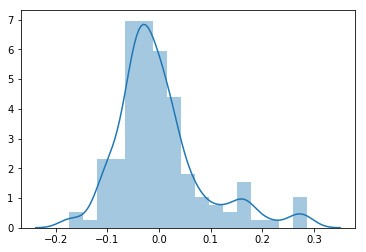

In [251]:
# Calculate the difference between the predicted and the actual y value
res = y_train - y_train_predict
sns.distplot(res)

## Prediction and Evaluation

In [252]:
carData_test.shape

(62, 57)

In [253]:
# Scale the test data
carData_test[num_vars] = scaler.transform(carData_test[num_vars])

C:\Users\Debayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Debayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [254]:
carData_test.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,audi,...,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0
mean,0.437764,0.559481,0.480376,0.428470,0.265673,0.556580,0.248858,0.239439,0.344661,0.032258,...,0.016129,0.500000,0.048387,0.016129,0.032258,0.854839,0.080645,0.0,0.0,0.0
std,0.212861,0.189947,0.165440,0.179488,0.162820,0.228484,0.163376,0.233076,0.175037,0.178127,...,0.127000,0.504082,0.216335,0.127000,0.178127,0.355139,0.274512,0.0,0.0,0.0
min,0.000000,0.056911,0.183333,0.128394,0.067925,-0.111111,0.016667,0.007763,0.002743,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.313793,0.459350,0.358333,0.305275,0.177358,0.404762,0.107292,0.092342,0.192387,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,0.387931,0.547967,0.441667,0.406129,0.226415,0.563492,0.218750,0.158991,0.326475,0.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,0.570690,0.719919,0.516667,0.564876,0.316038,0.746032,0.295833,0.317243,0.451303,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,1.182759,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,1.112855,0.747599,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [255]:
# Separate the test data into X and Y values
y_test = carData_test.pop('price')
X_test = carData_test

In [256]:
# Now let's use our model to make predictions.
X_train_new = X_train_lm.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\Debayan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [257]:
y_pred = lr_1.predict(X_test_new)

In [258]:
# r2 score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.862263506336251

## The model has R2 train as 84.4 and R2 test as 86.2

Text(0, 0.5, 'y_pred')

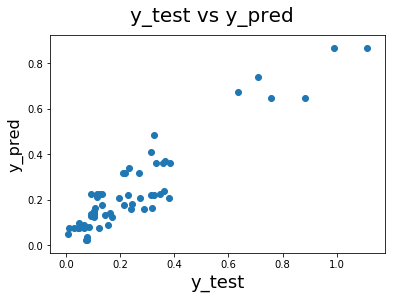

In [259]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [260]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.60e-53
Time:                        22:42:05   Log-Likelihood:                 149.93
No. Observations:                 143   AIC:                            -287.9
Df Residuals:                     137   BIC:                            -270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.013      0.794      0.4


We can see that the equation of our best fitted line is:

$ price = 0.0106 + 0.7544  \times  horsepower + 0.3076  \times  bmw + 0.4264 \times buick + 0.3114 \times jaguar + 0.1357 \times porsche $
